<a href="https://colab.research.google.com/github/atanaskostov79/TensorFlow/blob/main/01_neutral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create** **Plot**

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

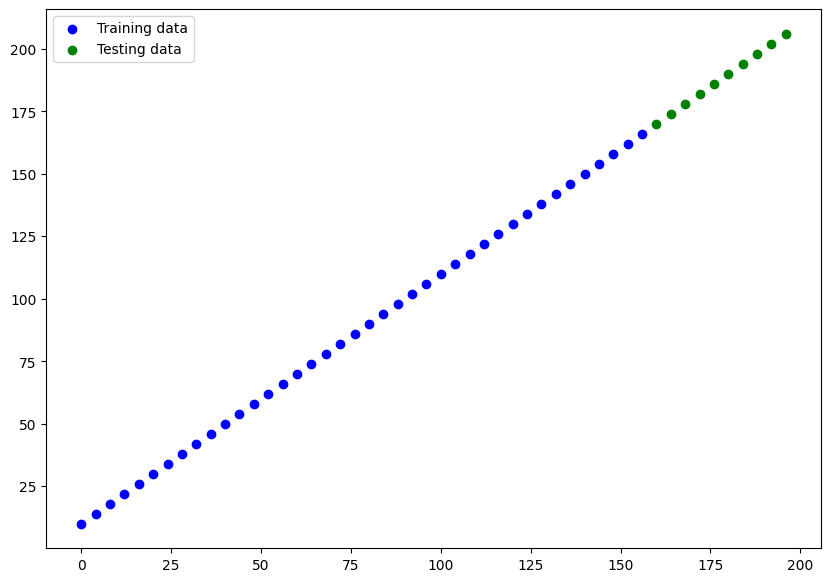

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

X = np.array(range(0, 200, 4))
y = X + 10

# plt.scatter(X ,Y, c="r")
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [62]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    # tf.keras.layers.Dense(20, activation="relu", input_dim=1),
    # tf.keras.layers.Dense(20, activation="relu"),

    tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.optimizers.Adam(),
              metrics=["mse"]
              )

history = model.fit(tf.expand_dims(X_train, axis=-1) , y_train, epochs=2000 , verbose=1, batch_size=10, callbacks=[callback])
# model.predict(42)

2.12.0
Epoch 1/2000
4/4 [==============================] - 1s 10ms/step - loss: 6792.7979 - mse: 6792.7979
Epoch 2/2000
4/4 [==============================] - 0s 6ms/step - loss: 5385.8013 - mse: 5385.8013
Epoch 3/2000
4/4 [==============================] - 0s 7ms/step - loss: 4115.6421 - mse: 4115.6421
Epoch 4/2000
4/4 [==============================] - 0s 5ms/step - loss: 3086.2761 - mse: 3086.2761
Epoch 5/2000
4/4 [==============================] - 0s 5ms/step - loss: 2216.1704 - mse: 2216.1704
Epoch 6/2000
4/4 [==============================] - 0s 6ms/step - loss: 1573.1672 - mse: 1573.1674
Epoch 7/2000
4/4 [==============================] - 0s 5ms/step - loss: 1041.2747 - mse: 1041.2747
Epoch 8/2000
4/4 [==============================] - 0s 6ms/step - loss: 658.3400 - mse: 658.3400
Epoch 9/2000
4/4 [==============================] - 0s 6ms/step - loss: 365.7531 - mse: 365.7531
Epoch 10/2000
4/4 [==============================] - 0s 6ms/step - loss: 189.7741 - mse: 189.7741
Epoch 1

Text(0.5, 0, 'epochs')

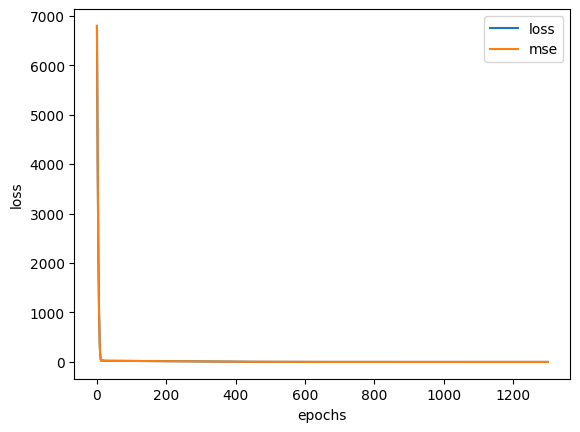

In [63]:
pd.DataFrame(history.history).plot()

plt.ylabel("loss")
plt.xlabel("epochs")

In [64]:
X, y

(array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
         52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
        104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
        156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196]),
 array([ 10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,
         62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110,
        114, 118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162,
        166, 170, 174, 178, 182, 186, 190, 194, 198, 202, 206]))

1/1 [==============================] - 0s 88ms/step


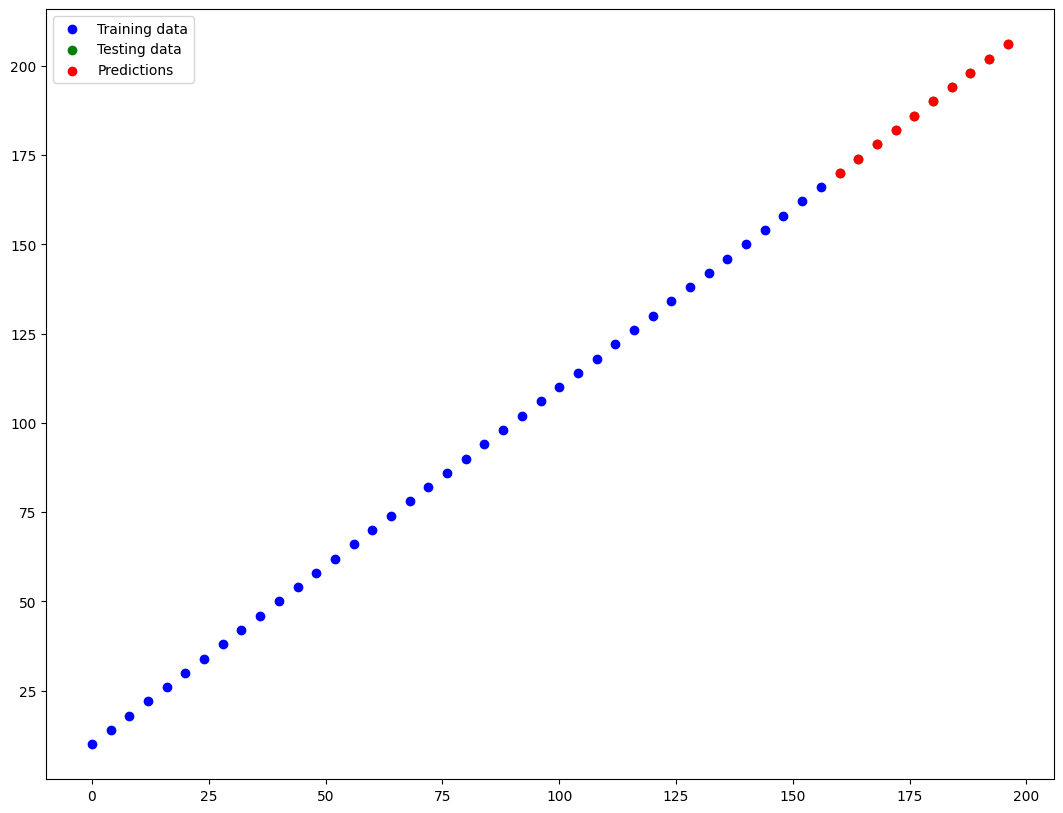

In [65]:
y_preds = model.predict(X_test)
y_preds
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [66]:
y_preds

array([[170.00002],
       [174.     ],
       [178.00006],
       [182.00005],
       [186.00003],
       [190.00003],
       [194.00002],
       [198.00002],
       [202.00002],
       [206.00003]], dtype=float32)

In [67]:
mae(y_test, y_preds.squeeze()).numpy() , mse(y_test, y_preds.squeeze()).numpy()

(2.5939942e-05, 9.546056e-10)

In [68]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
  

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(13, 10))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

